# CellMap for pancreas endocrine cell data

The tutorial for pancreas endocrine cell data ([Bastidas et al., 2019](https://doi.org/10.1242/dev.173849)).

# Input & preprpcessing

In [1]:
import cellmap
import numpy as np
import scanpy

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [ ]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

## Noise reduction by [RECODE](https://github.com/yusuke-imoto-lab/RECODE).

start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 10602, '#non-significant genes': 7148, '#silent genes': 10248, 'ell': 100, 'Elapsed time': '0h 0m 26s 895ms', 'solver': 'full', '#test_data': 739}


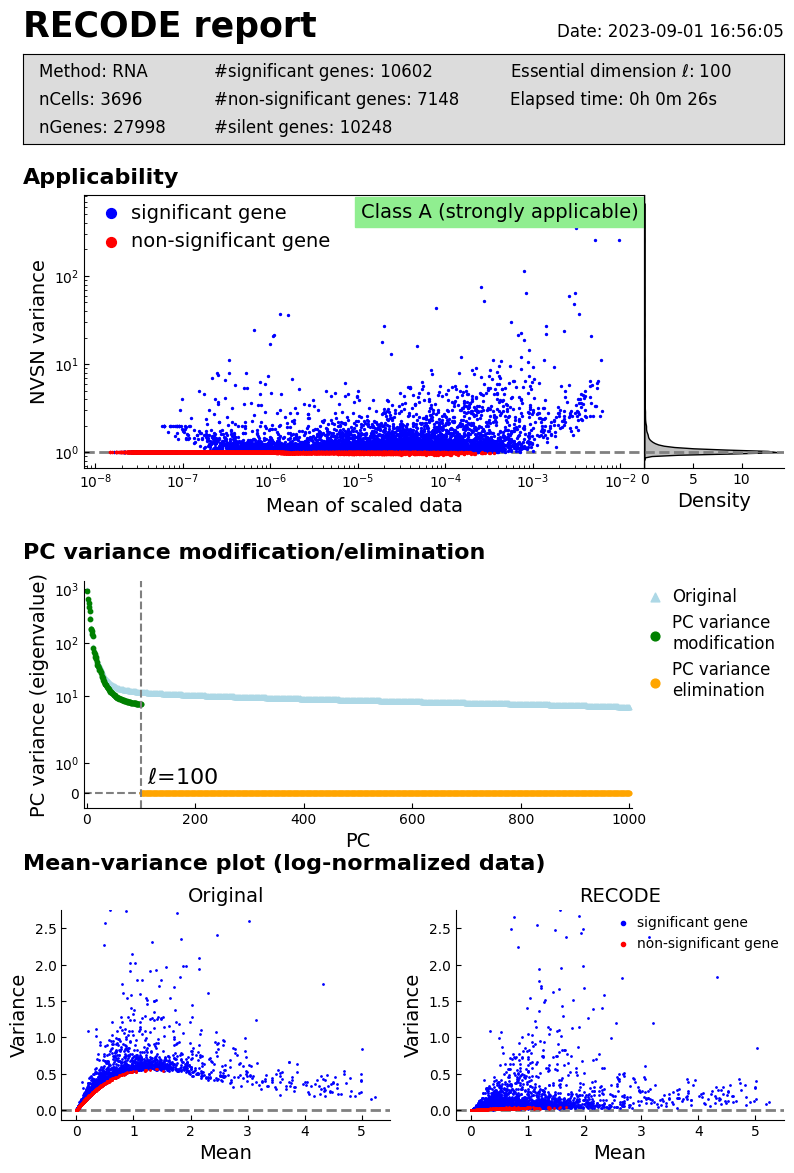

In [ ]:
import screcode
recode = screcode.RECODE()
adata.layers['RECODE'] = recode.fit_transform(adata.X.toarray())
adata.layers['RECODE_log'] = np.log(1e4*adata.layers['RECODE'].T/np.sum(adata.layers['RECODE'],axis=1)+1).T
recode.report()

## Log transformtaion

In [ ]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

## RNA velocity

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:14) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:22) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


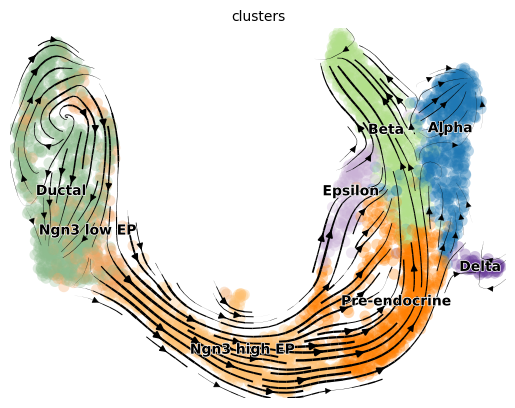

In [ ]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata)

# Hodge decomposition

In [ ]:
cellmap.Hodge_decomposition(adata)#,graph_method='Delauney'

{'Contribution_ratio': {'Potential': '55.57%', 'Rotation': '44.43%'}}


## View flows

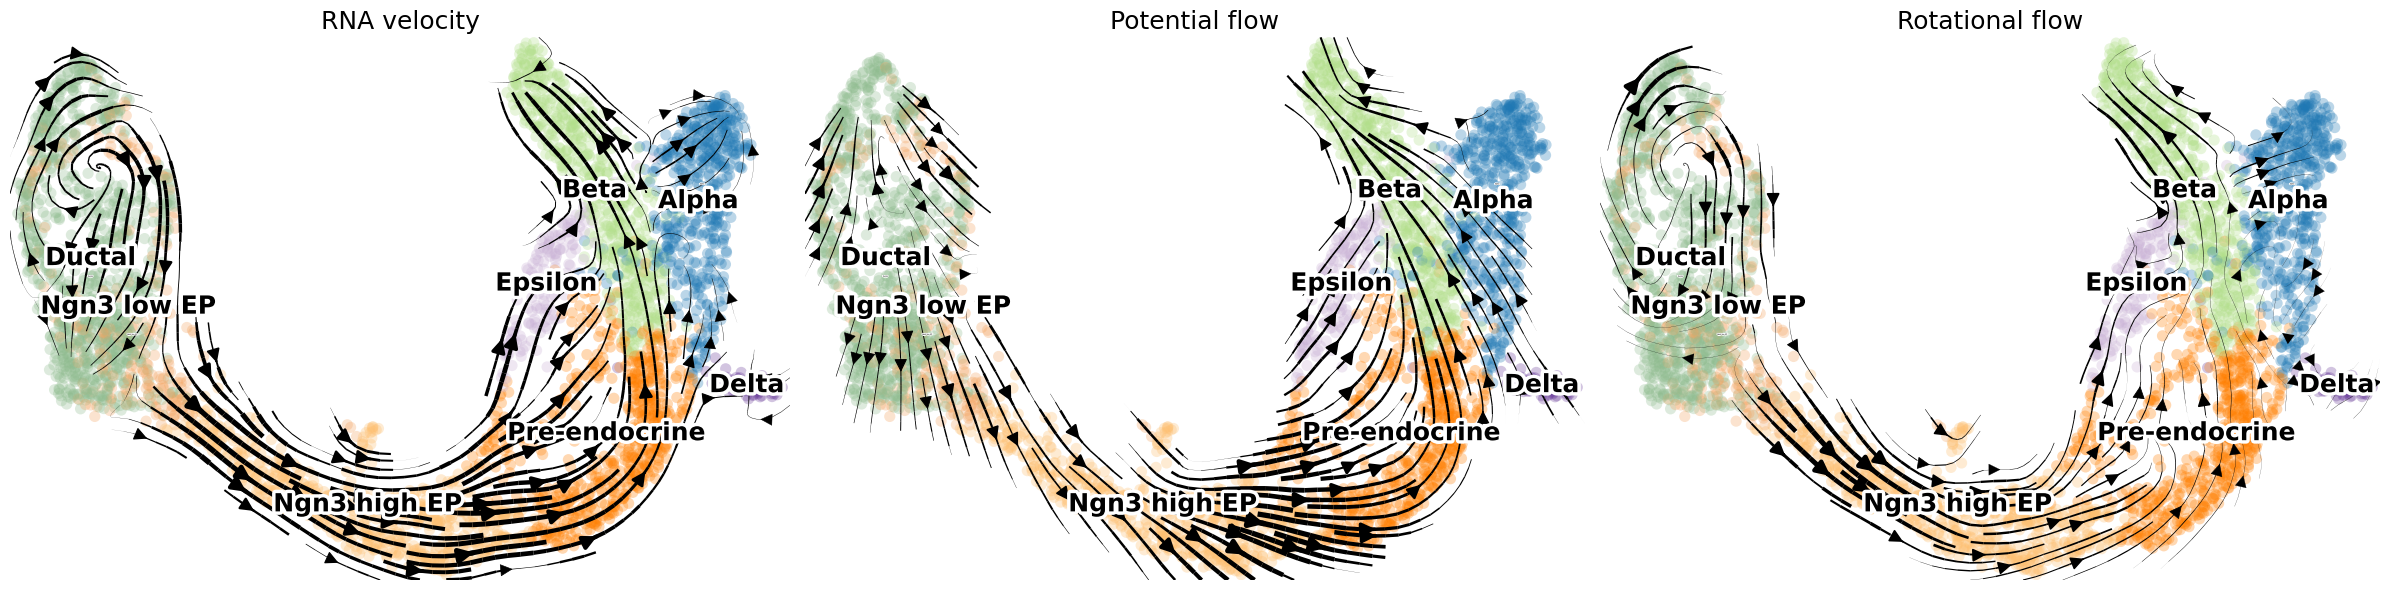

In [ ]:
cellmap.view_stream(adata)

## View orbits

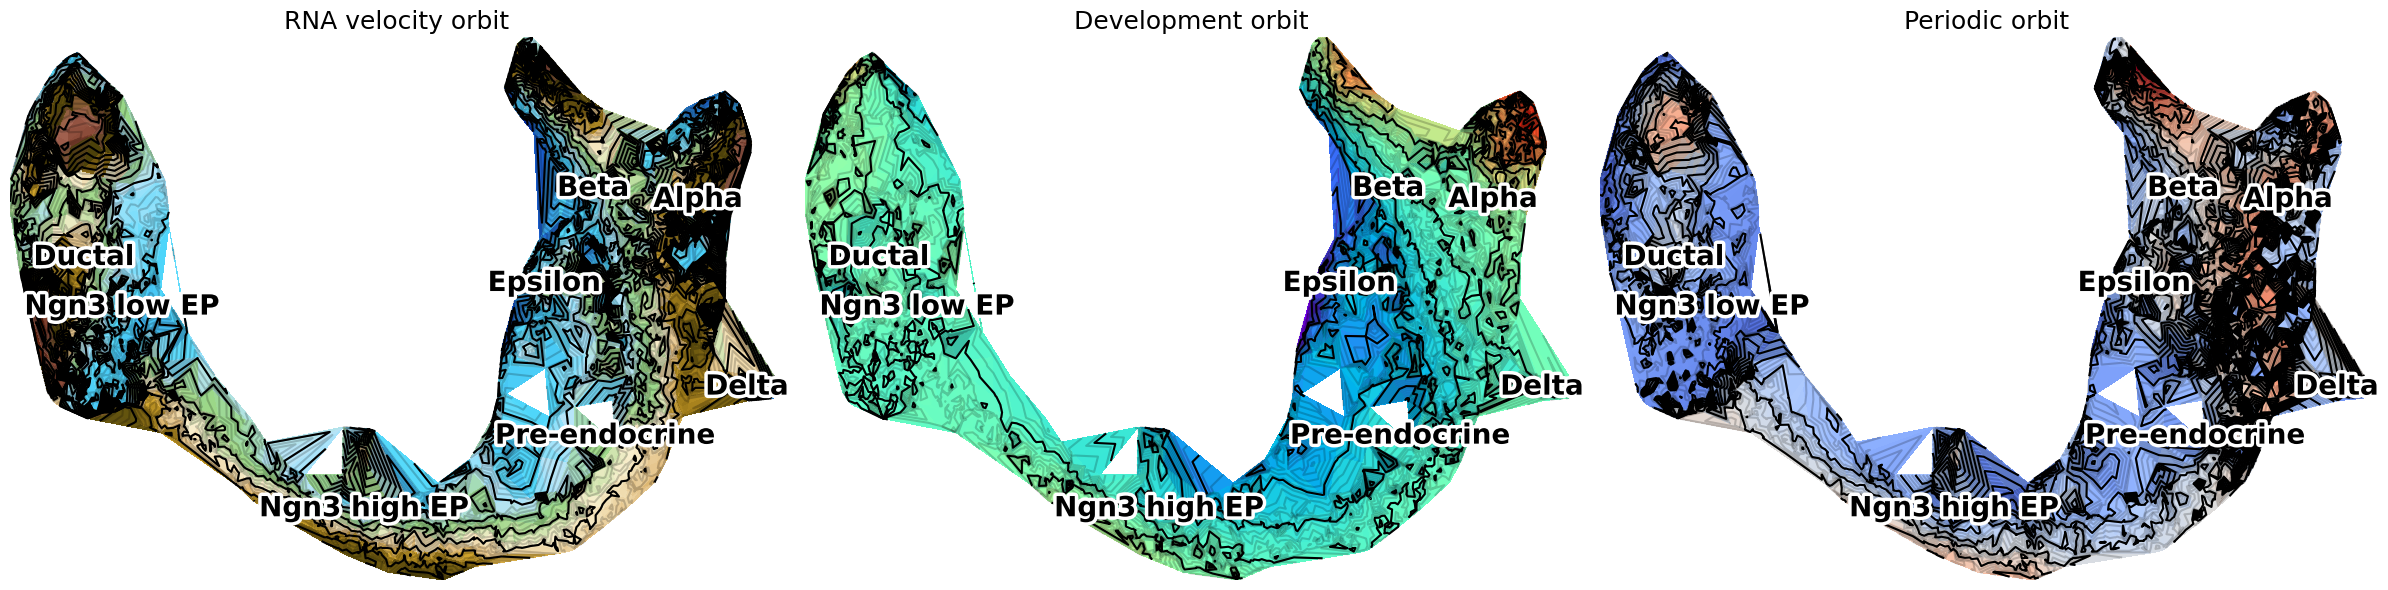

In [ ]:
cellmap.view_stream_line(adata)

## View Hodge potential

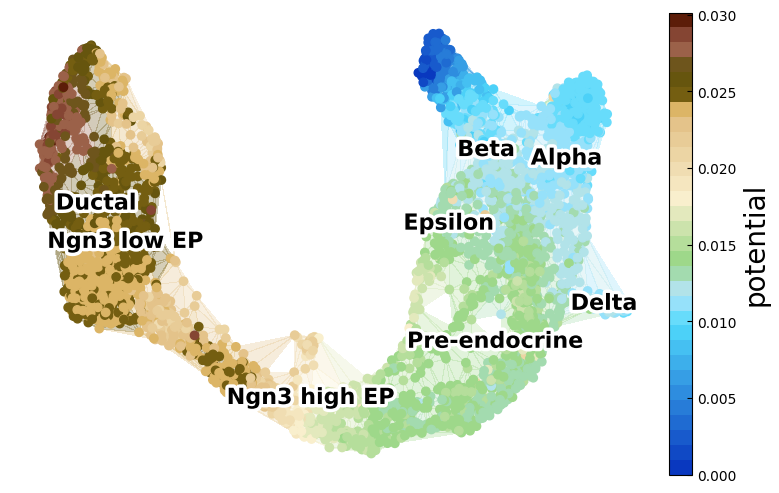

In [ ]:
cellmap.view(adata,show_graph = True,cluster_key = 'clusters')

## View Hodge potential 3D

In [ ]:
cellmap.view_3D(adata,cluster_key ='clusters',elev=50,azim=65)

## Write for [CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer). 

In [ ]:
cellmap.write(adata,filename='CellMap_tutorial_pancreas',exp_key='RECODE_log')

succeeded in writing CellMapp data as "CellMap_tutorial_pancreas.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


X         Y  Potential     Annotation      Rotation  \
CellID                                                                          
AAACCTGAGAGGGATA   6.143066 -0.063644   0.013476  Pre-endocrine -1.264613e-16   
AAACCTGAGCCTTGAT  -9.906417  0.197778   0.023906         Ductal  6.533258e-16   
AAACCTGAGGCAATTA   7.559791  0.583762   0.012456          Alpha  6.042042e-16   
AAACCTGCATCATCCC -11.283765  4.218998   0.027509         Ductal -2.016761e-16   
AAACCTGGTAAGTGGC   1.721565 -4.753407   0.013960   Ngn3 high EP  3.154595e-16   
...                     ...       ...        ...            ...           ...   
TTTGTCAAGTGACATA   4.768472 -1.388353   0.011956  Pre-endocrine -6.567167e-18   
TTTGTCAAGTGTGGCA  -1.873335 -4.182650   0.016568   Ngn3 high EP -3.966734e-17   
TTTGTCAGTTGTTTGG  -9.882250 -0.105594   0.024128         Ductal  1.718822e-17   
TTTGTCATCGAATGCT   6.612424  4.531895   0.011146          Alpha  3.402931e-17   
TTTGTCATCTGTTTGT   3.071043  1.120432   0.012912        Epsilon  2.749537e-17   

                  Streamline_Original  Streamline_Potential  \
CellID                                                        
AAACCTGAGAGGGATA             0.421168              0.421168   
AAACCTGAGCCTTGAT             0.580323              0.580323   
AAACCTGAGGCAATTA             0.585532              0.585532   
AAACCTGCATCATCCC             0.666196              0.666196   
AAACCTGGTAAGTGGC             0.473753              0.473753   
...                               ...                   ...   
TTTGTCAAGTGACATA             0.097560              0.097560   
TTTGTCAAGTGTGGCA             0.454534              0.454534   
TTTGTCAGTTGTTTGG             0.585647              0.585647   
TTTGTCATCGAATGCT             0.781470              0.781470   
TTTGTCATCTGTTTGT             0.381861              0.381861   

                  Streamline_Rotation  Vorticity_Original  \
CellID                                                      
AAACCTGAGAGGGATA             0.418303            0.359028   
AAACCTGAGCCTTGAT             0.248289            1.948956   
AAACCTGAGGCAATTA             0.225770           -1.484665   
AAACCTGCATCATCCC             0.407825            0.051169   
AAACCTGGTAAGTGGC             0.317195           -0.144355   
...                               ...                 ...   
TTTGTCAAGTGACATA             0.205046           63.135319   
TTTGTCAAGTGTGGCA             0.227845            0.900818   
TTTGTCAGTTGTTTGG             0.251127            1.340401   
TTTGTCATCGAATGCT             0.238654          -55.312384   
TTTGTCATCTGTTTGT             0.382278           -1.209716   

                  Vorticity_Potential  ...   HVG_Npy  HVG_Krtap17-1  HVG_Gast  \
CellID                                 ...                                      
AAACCTGAGAGGGATA             0.359028  ...  0.202556       0.815123  0.000000   
AAACCTGAGCCTTGAT             1.948956  ...  0.000000       0.000000  0.487266   
AAACCTGAGGCAATTA            -1.484665  ...  0.000000       0.000000  2.267041   
AAACCTGCATCATCCC             0.051169  ...  0.000000       0.000000  0.000000   
AAACCTGGTAAGTGGC            -0.144355  ...  0.000000       0.000000  0.418264   
...                               ...  ...       ...            ...       ...   
TTTGTCAAGTGACATA            63.135319  ...  0.000000       0.311312  0.116789   
TTTGTCAAGTGTGGCA             0.900818  ...  0.654389       1.118192  0.000000   
TTTGTCAGTTGTTTGG             1.340401  ...  0.349560       0.000000  0.200447   
TTTGTCATCGAATGCT           -55.312384  ...  0.183375       0.351712  2.113241   
TTTGTCATCTGTTTGT            -1.209716  ...  0.000000       0.000000  0.759684   

                   HVG_Ppy  HVG_8430408G22Rik  HVG_Ppp1r1a  HVG_Peg10  \
CellID                                                                  
AAACCTGAGAGGGATA  0.000000           0.000000     0.071403   0.000000   
AAACCTGAGCCTTGAT  1.122035           1.059910     0.338856   0.588133   
AAACCTGAGGCA

# Dynamical analysis

## Single-cell trajectory

UnboundLocalError: local variable 'tri_' referenced before assignment

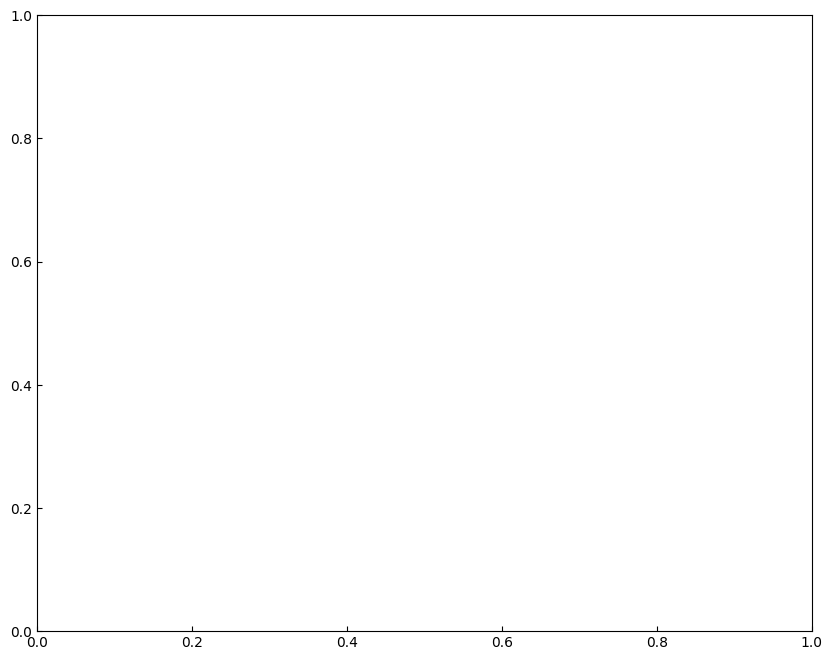

In [ ]:
source_cluster = 'Ductal'
target_clusters = ['Alpha','Beta','Delta']
cellmap.view_trajectory(adata,source_cluster,target_clusters,weight_rate=0.9,graph_method="knn")

## Gene expression dynamics

In [ ]:
cellmap.calc_gene_dynamics(adata,source_cluster,target_clusters)

Done the computation of gene dynamics


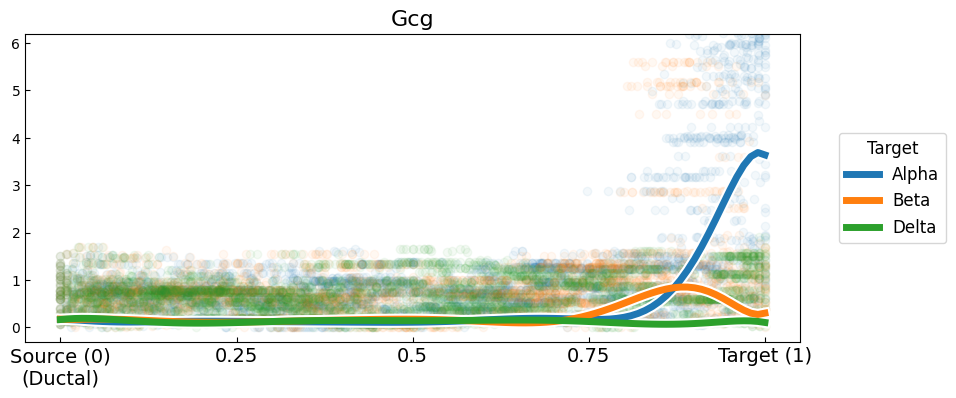

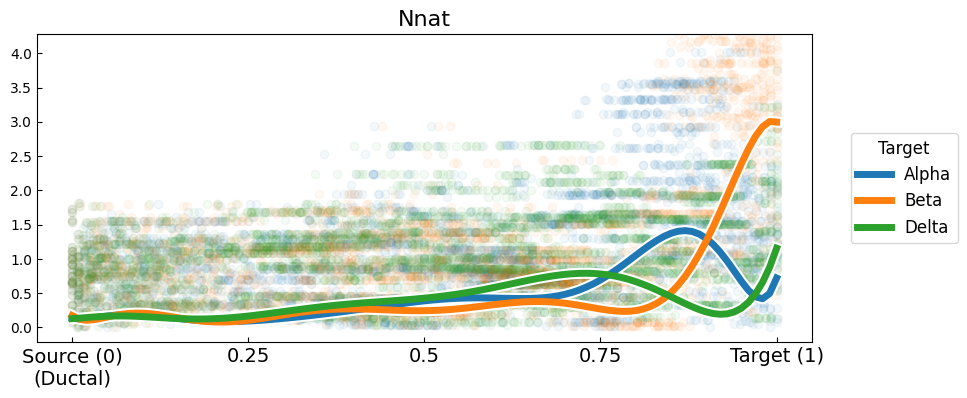

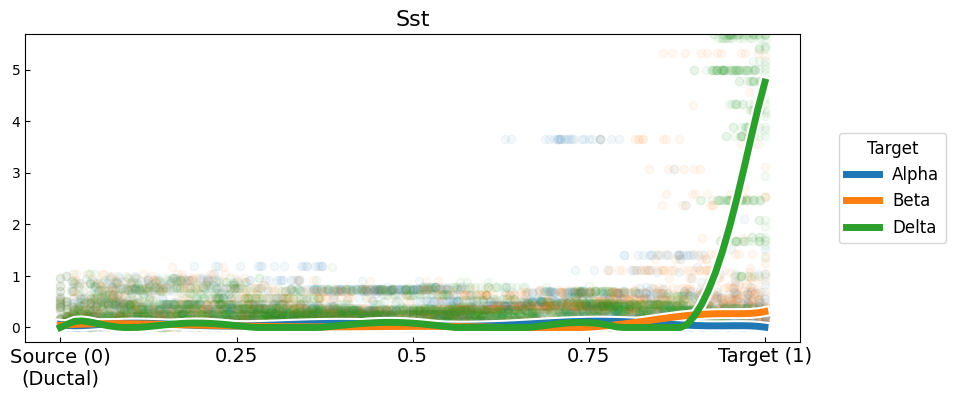

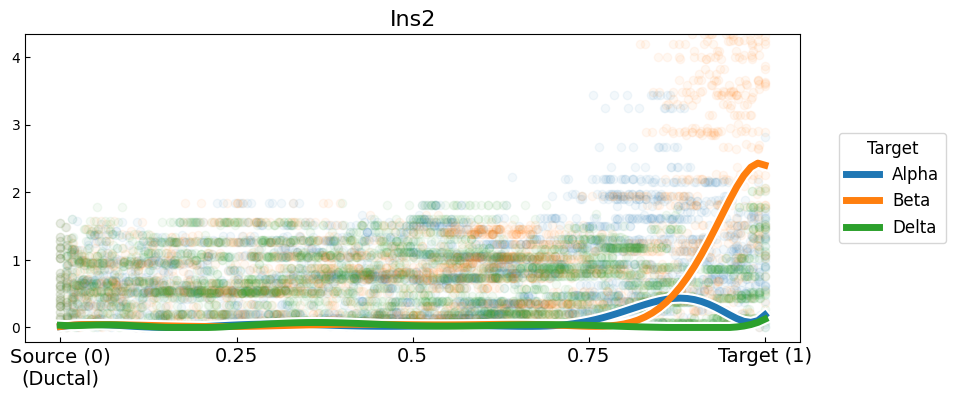

In [ ]:
genes = ['Gcg','Nnat','Sst','Ins2'] 
cellmap.gene_dynamics_plot(adata,source_cluster,target_clusters,genes,exp_key='RECODE_log')

## Bifurcation diagram

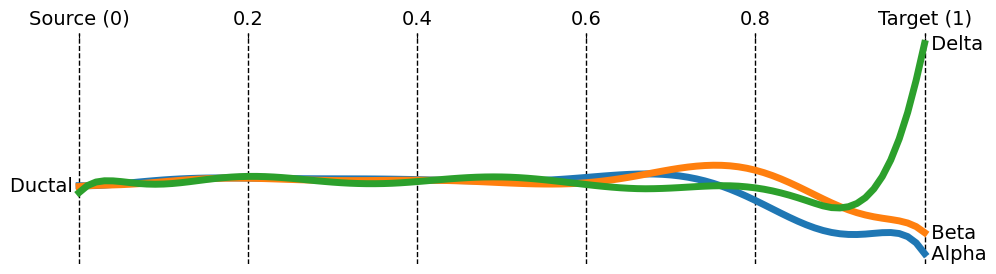

In [ ]:
cellmap.bifurcation_diagram(adata,source_cluster,target_clusters)

## DEG dynamics

In [ ]:
cellmap.DEG_dynamics(adata,source_cluster,target_clusters,
                     show=False,save=True,
                     save_dir="output",save_filename="DEG_dynamics_pancreas")


Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Beta.gif...
...computing Alpha vs Beta (1/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Delta.gif...
...computing Alpha vs Delta (2/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Beta_Delta.gif...
...computing Beta vs Delta (3/3) 101/101

## Key gene dynamics

Alpha_vs_Beta            Alpha_vs_Delta             Beta_vs_Delta           
           gene Alpha Beta           gene Alpha Delta          gene Beta Delta
1          Gast     +    -          Pcsk2     +     -        Tmem27    +     -
2          Scg2     -    +           Hhex     -     +        Dbpht2    +     -
3          Nnat     -    +         Cryba2     -     +          Scg2    +     -
4        Scand1     +    -         Dbpht2     +     -          Iapp    +     -

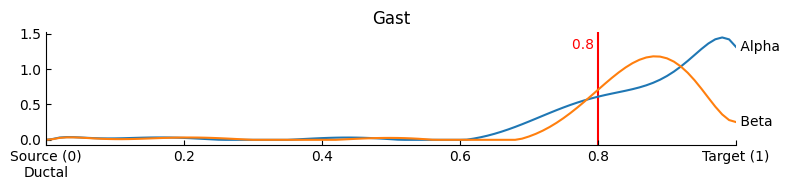

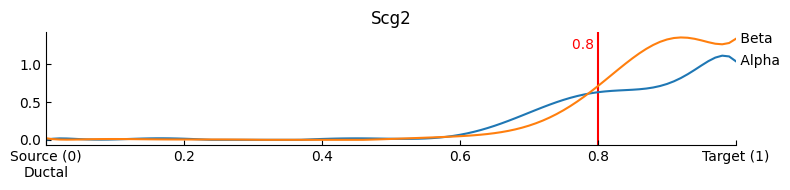

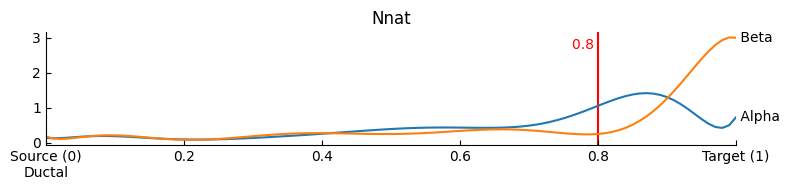

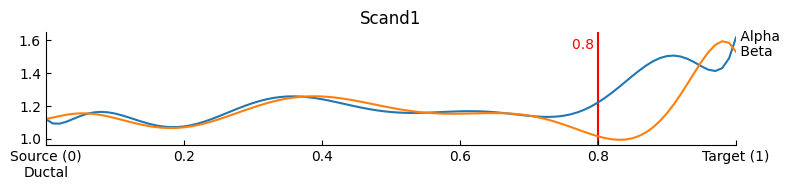

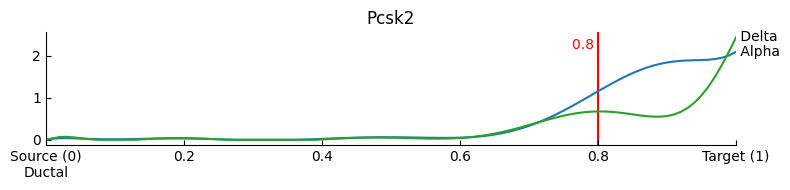

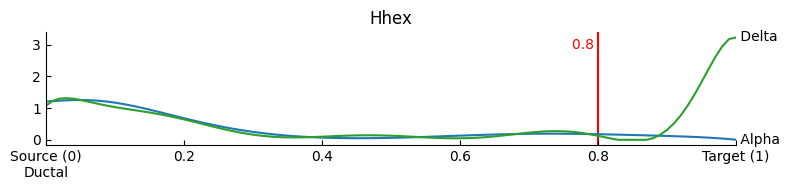

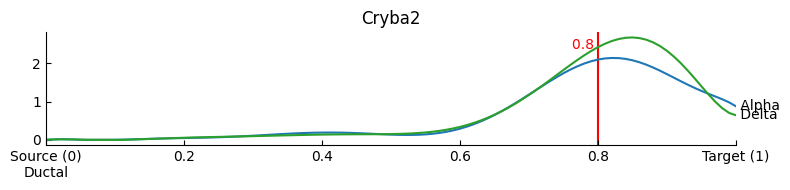

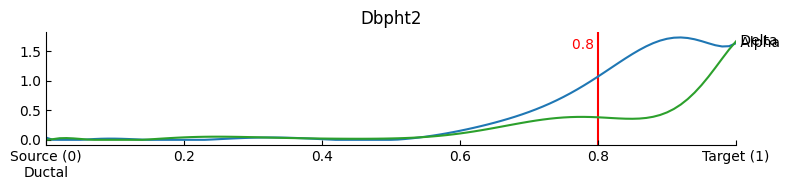

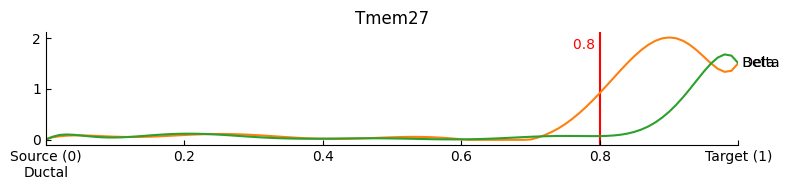

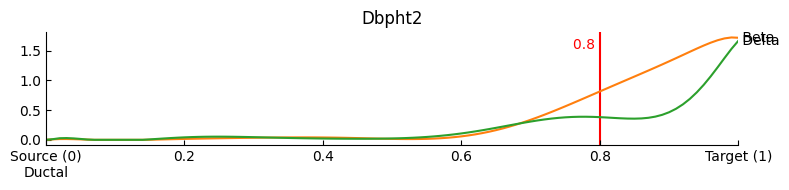

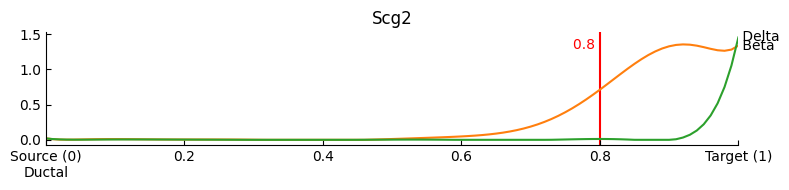

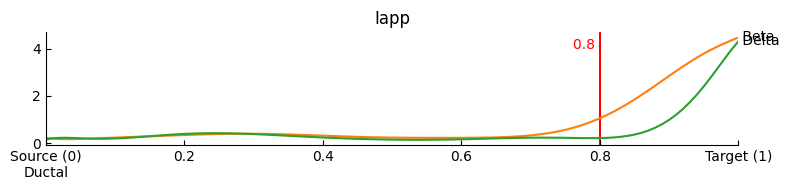

In [ ]:
cellmap.key_gene_dynamics(adata,source_cluster,target_clusters,n_genes=4,time=0.8)

## GRN infernece

In [ ]:
cellmap.calc_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')

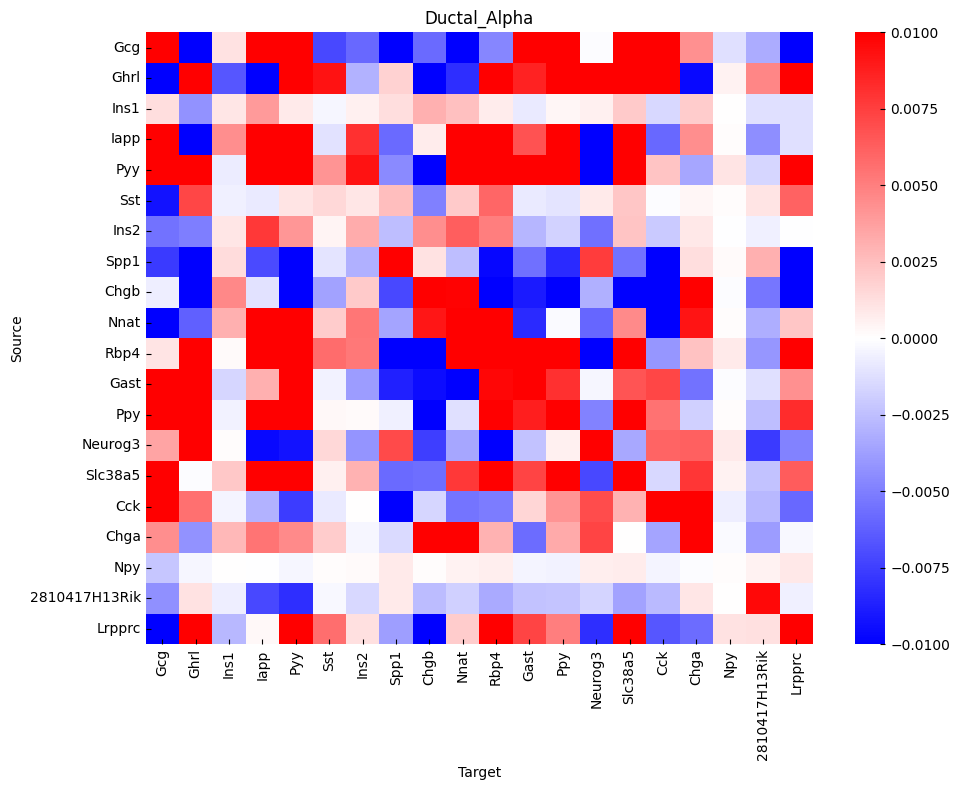

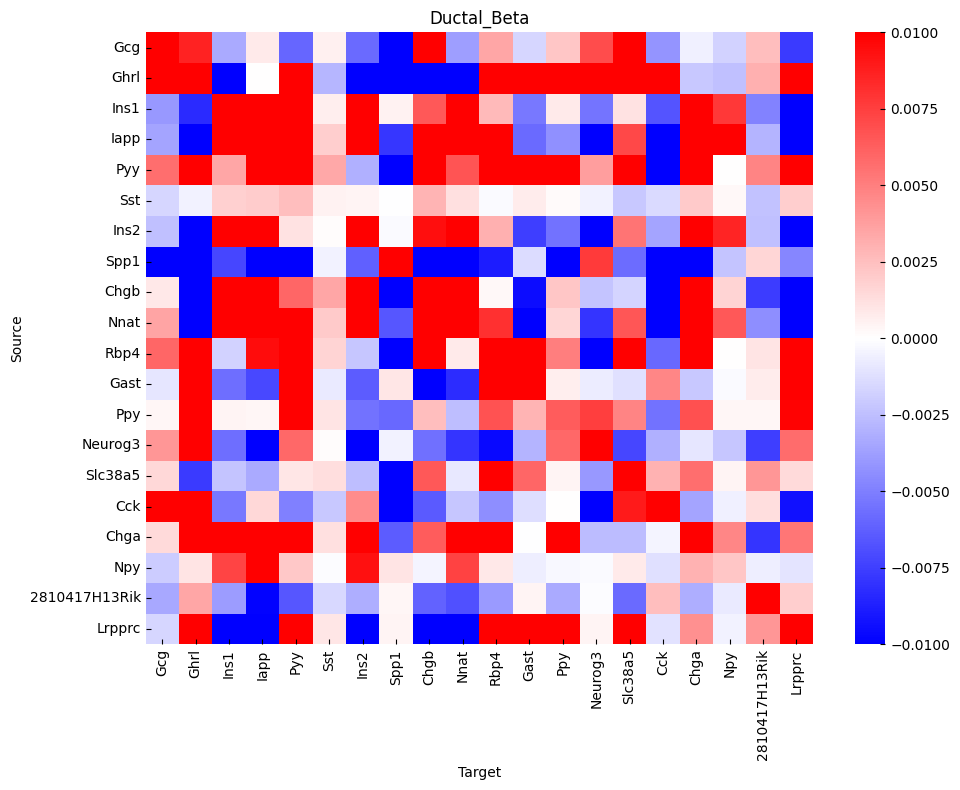

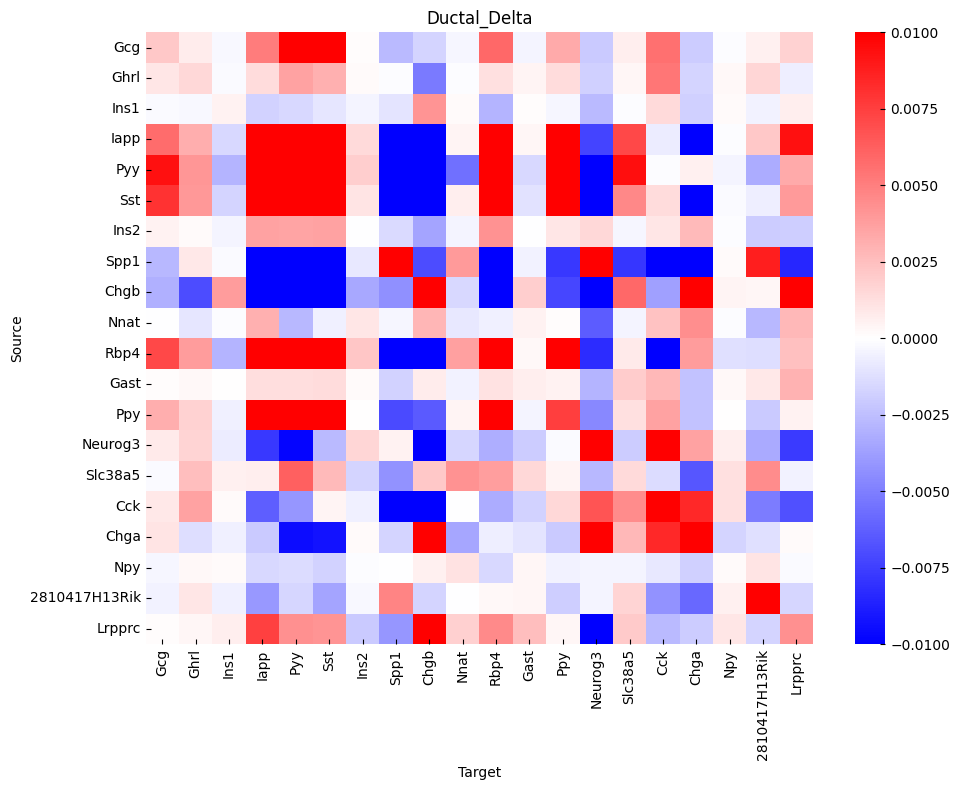

In [ ]:
cellmap.view_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')